# Premier League Scraper
### By Darren Gidado

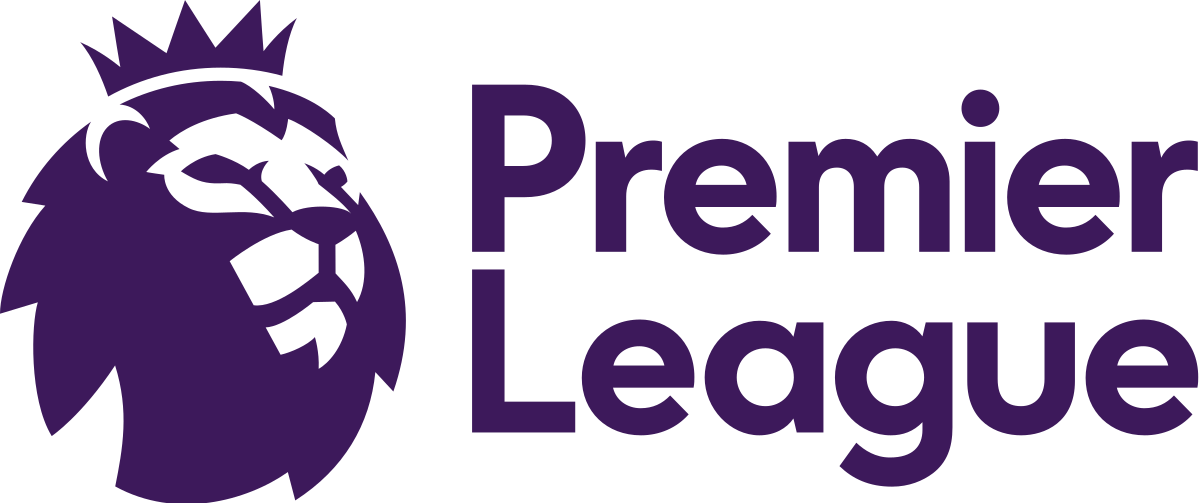

In [1]:
from PIL import Image # Library for importing images
Image.open('images/Premier_League_Logo.jpg')

## Table of Contents 📋

* [Introduction](#introduction)
* [Importing Libraries](#importing_libraries)
* [Method 1: HTML Table Scraping](#method_1)
* [Method 2: Beautiful Soup Scraping](#method_2)
* [Method 3: Using an API and JSONs](#method_3)

## Introduction 👋 <a class="anchor" id="introduction"></a>

Data scraping data, also known as web scraping is the process of extracting data from a website programmatically. The destination of the extracted data can vary, in some cases to channel that data to another websitebut is commonly saved to a spreadsheet or local file saved on your computer. It’s one of the most efficient ways to get data from the web aside from directly querying a REST API. 

#### We are going to be extracting Premier League data such as:
- All-time Top Scorers
- 2020-21 - League Table
- 2020/21 Top Scorers

## Importing Libraries 📚 <a class="anchor" id="importing_libraries"></a>

We are going to be using the official <a href="https://www.premierleague.com/">Premier League</a> website to extract the data we need. The libraries we are using are as follows:

- **Pandas:** This will be used to generate our dataframes
- **Numpy:** Numpy will be used to calculate our numeric data such as player statistics
- **Beautiful Soup:** Is a parsing library we will use it for extract data for each player and put them into a table
- **Matplotlib & Seaborn:** We will use these two libraries to plot charts of data we extract at the EDA stage
- **Datetime:** We will use datetime to deal with date of birth and match date strings
- **RegEx (RE):** Regex is a library used for extracting patterns of strings, we can use it for
- **Requests:** This library will be used for sending HTTP/1.1 requests to the Premier League website
- **JSON:** With requests there is no need to manually add query strings to our URLs, or to form-encode your PUT & POST data. We can just use the json method! We will be using JSON to read the JSON files from the API included in the HTTP requests

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup, SoupStrainer
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sb
from datetime import datetime
import re
import requests
import json
%matplotlib inline

# Display max rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Planning 📅 <a class="anchor" id="planning"></a>
Our objective is to take data from the existing tables where possible in the least amount of code. However, some of the data we want will be specifically curated depending on our requirements. It will also be nice to have as clean data as possible before it is written to the dataframe. 

#### Method 1: HTML Table Scraping 👌

The easiest way to extract tabular data from a website is if we extract it from an existing html table, we can do that using `requests`.

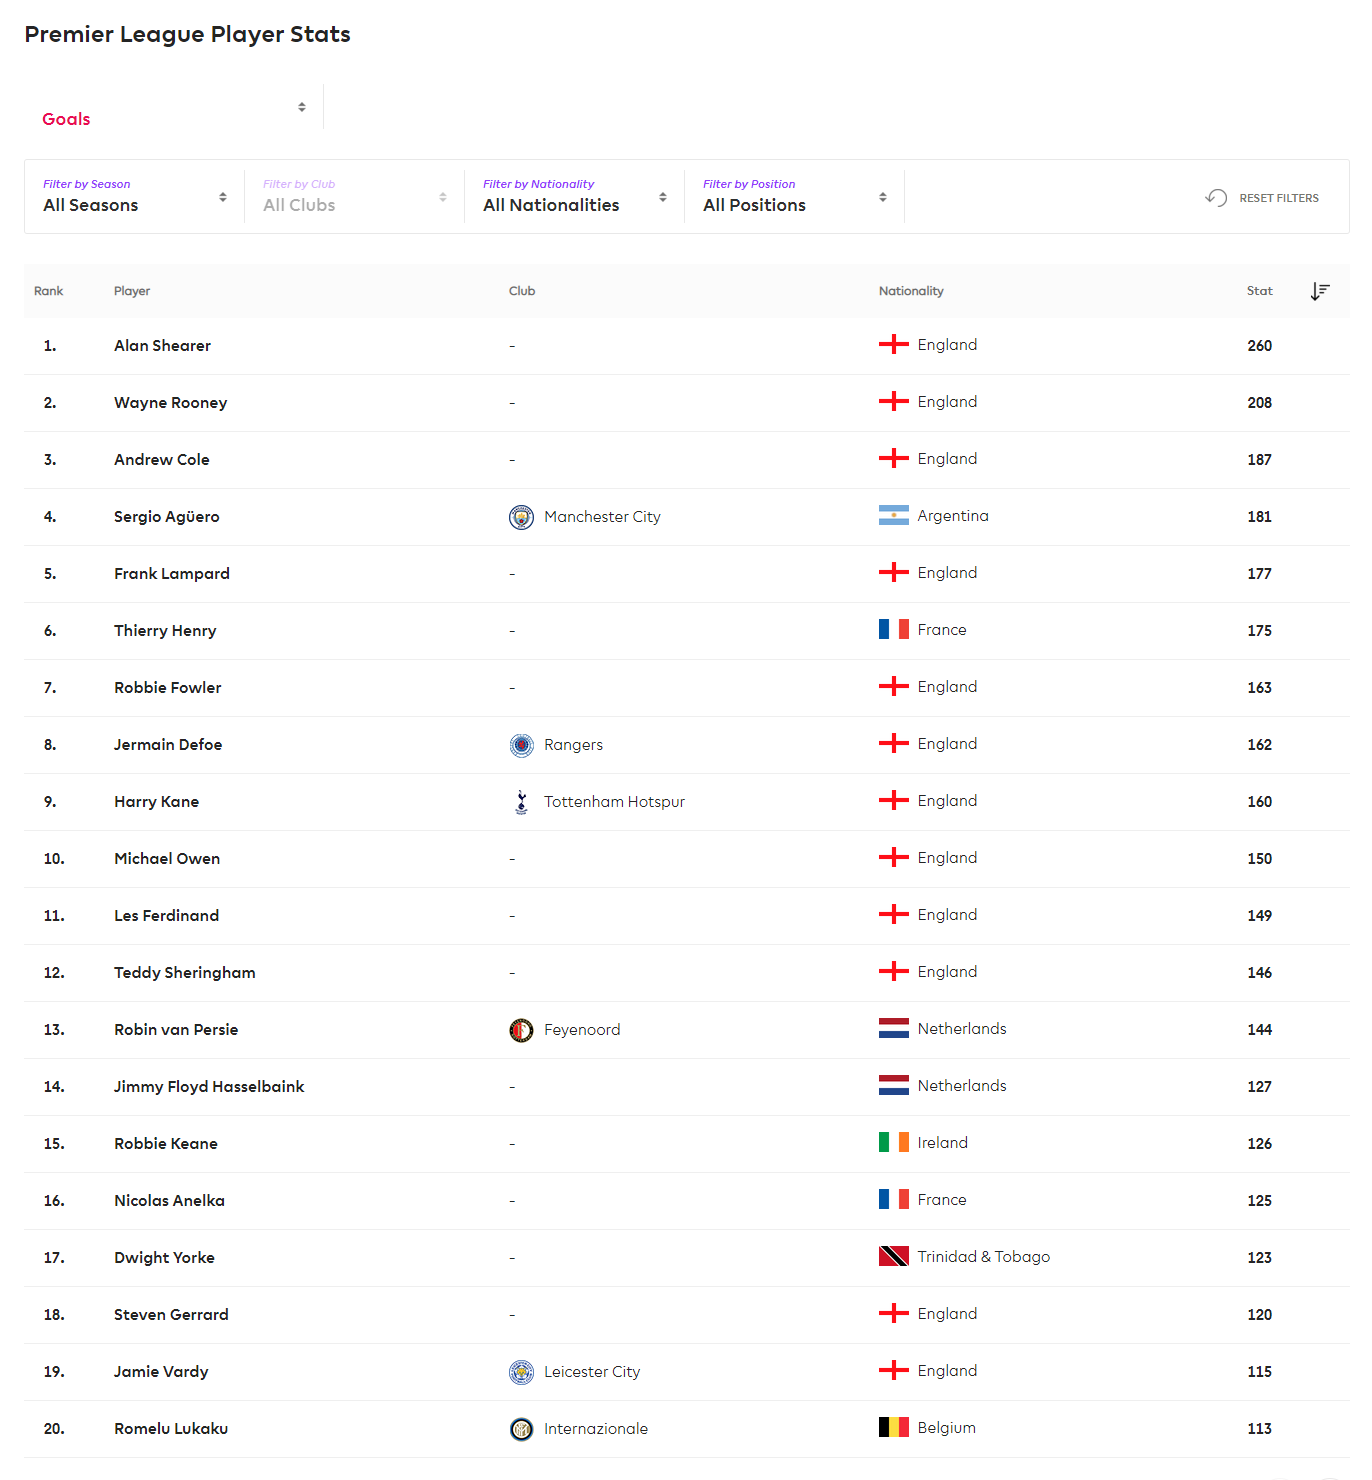

In [3]:
Image.open('images/at_table.png')

#### Method 2: Beautiful Soup Scraping 🥣

Beautiful Soup is a great way to extract data from various sources by targeting specific HTML elements such as `p` and `div` tags. We can then create a dataframe and append each element to it programmatically using loops. However, this approach has certain limitations especially on the Premier League website which uses dynamic webpage loading. This means the HTML page has elements which are hidden on the client-side then generated as the user scrolls down. Examples of such behavour can be seen when we scrolling down the webpage to reveal more players on the player page. 

The problem with this is that the HTML file does not contain the information of the hidden elements so if you tried to scrap the page you would only get the data of the visible elements. The only way you would be able to fully load the page would be to scroll down the page manually until all the elements have been revealed then scrape the page. This method can be rather tedious as if you did that with something like a Twitter feed you could be scrolling for hours! There are two solutions for this. 

- **Option 1:** We could use Selenium, a browswer automation tool; to open a headless browser, scroll down the page then use that HTML for Beautiful Soup to parse and scrape.

- **Option 2:** We can access the API by intercepting and reusing the JSON requests used to pull data into the search results when we scroll down the page.

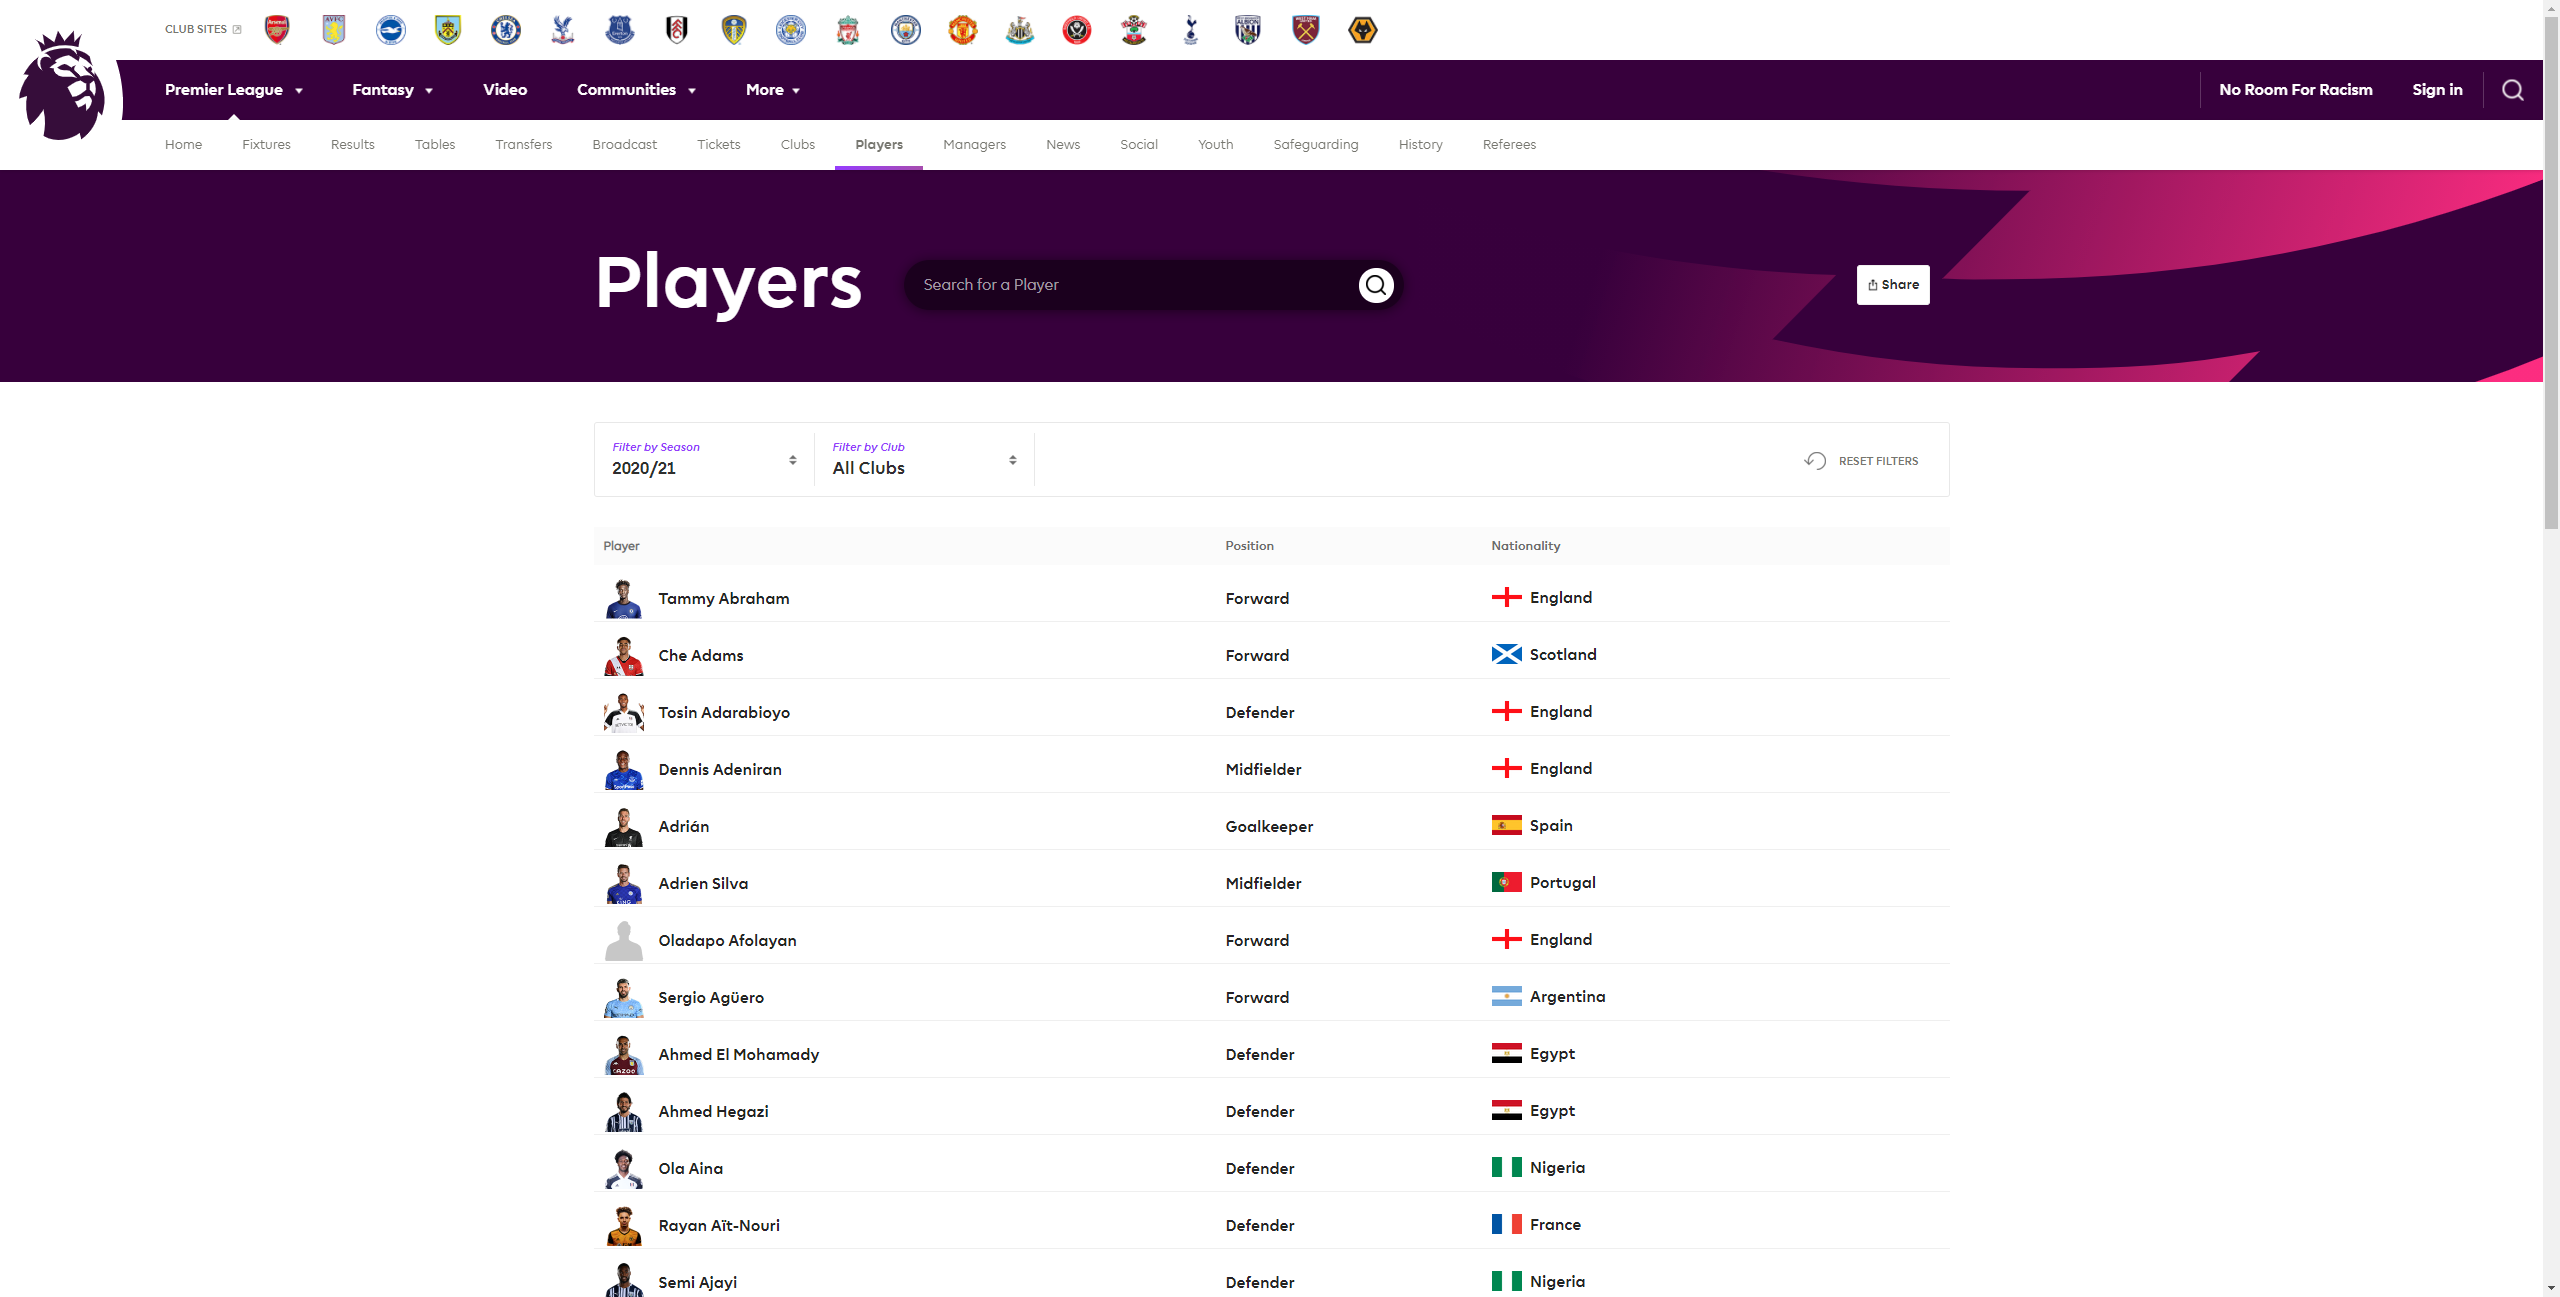

In [4]:
Image.open('images/premier_league_players.png')

#### Method 3: Using an API and JSONs 🔥
We can use this method to directly interface with the API populating the webpage. The JSON file contains all the data we need to populate our dataframe but we can also use it inconjuntion with our Beautiful Soup scraping method to fill in missing data we find from each player. We can do this by left clicking on the webpage and scrolling down to 'Inspect' on Google Chrome, then going to the 'Network' section of the resulting sidebar called the 'Elements Panel'. In the Network we can see every request the webpage makes to the server, we need to filter down our search to 'XHR and Fetch' so we will click the 'XHR' tab.

Scroll down on the 'Players' page once this is all setup and you will notice some files start to populate the Elements Panel. These are URL requests as this webpage is dynamic and generates content with Javascript as we scroll down but is actually paginated even though it looks like an infinitely scrolling page.

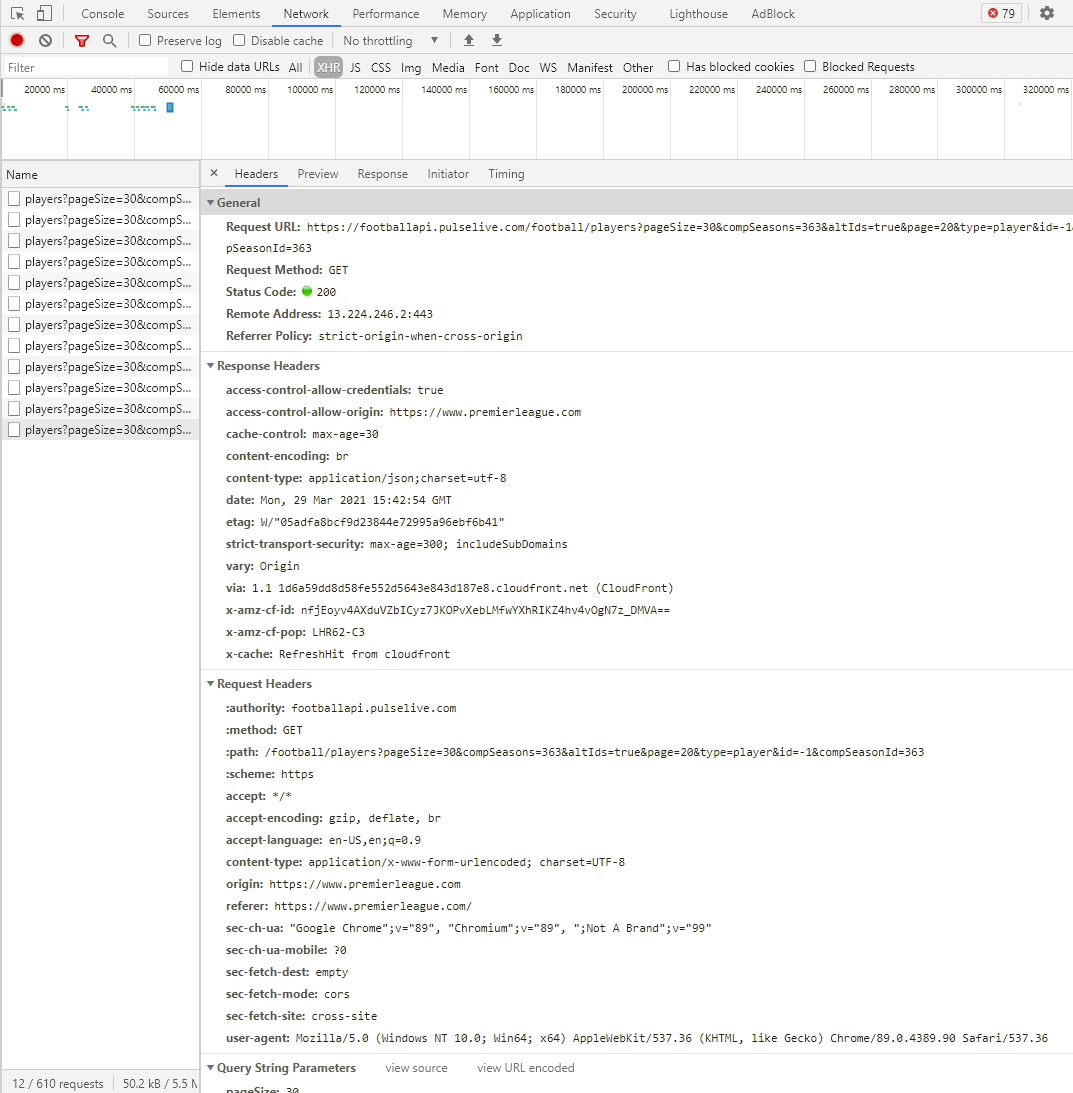

In [5]:
Image.open('images/network_activity.png')

#### Using Datetime to keep track of time data was scraped

In [6]:
# Creating a datetime variable
now = datetime.now()
current_date = now.strftime("%d/%m/%y")
current_time = now.strftime("%H:%M:%S")

# Print
print("Current Date =", current_date)
print("Current Time =", current_time)

Current Date = 29/03/21
Current Time = 19:33:48


## Method 1: HTML Table Scraping 👌 <a class="anchor" id="method_1"></a>

We can use `requests.get()` to load the website into the variable called `Response` before reading it using `pd.read_html`. We load this variable into another variable named `at_goals` then append `response.text` inside our built-in function: `pd.read_html()`. Our next step is to select the table number we need then remove the data or columns we don't need.

### All-time goal scorers Table

In [7]:
# Extracting basic tabular data for all-time goal scorers
response = requests.get('https://www.premierleague.com/stats/top/players/goals') 
at_goals_r = pd.read_html(response.text)

In [8]:
at_goals_r

[    Rank                   Player               Club        Nationality  Stat  \
 0      1             Alan Shearer                  -            England   260   
 1      2             Wayne Rooney                  -            England   208   
 2      3              Andrew Cole                  -            England   187   
 3      4            Sergio Agüero    Manchester City          Argentina   181   
 4      5            Frank Lampard                  -            England   177   
 5      6            Thierry Henry                  -             France   175   
 6      7            Robbie Fowler                  -            England   163   
 7      8            Jermain Defoe                  -            England   162   
 8      9               Harry Kane  Tottenham Hotspur            England   160   
 9     10             Michael Owen                  -            England   150   
 10    11            Les Ferdinand                  -            England   149   
 11    12       

In [9]:
# Loading the all-time list and using iloc to remove column: Unamed: 5 (the filter column)
at_goals = at_goals_r[0].iloc[:,:-1].style.hide_index() 
at_goals

Rank,Player,Club,Nationality,Stat
1,Alan Shearer,-,England,260
2,Wayne Rooney,-,England,208
3,Andrew Cole,-,England,187
4,Sergio Agüero,Manchester City,Argentina,181
5,Frank Lampard,-,England,177
6,Thierry Henry,-,France,175
7,Robbie Fowler,-,England,163
8,Jermain Defoe,-,England,162
9,Harry Kane,Tottenham Hotspur,England,160
10,Michael Owen,-,England,150


### All-time assists Table

In [10]:
# Extracting basic tabular data for all-time assists
response = requests.get('https://www.premierleague.com/stats/top/players/goal_assist') 
at_ast_r = pd.read_html(response.text)

# Loads the all-time list
at_ast = at_ast_r[0].iloc[:,:-1].style.hide_index() 
at_ast

Rank,Player,Club,Nationality,Stat
1,Ryan Giggs,-,Wales,162
2,Cesc Fàbregas,-,Spain,111
3,Wayne Rooney,-,England,103
4,Frank Lampard,-,England,102
5,Dennis Bergkamp,-,Netherlands,94
6,David Silva,-,Spain,93
7,Steven Gerrard,-,England,92
8,James Milner,Liverpool,England,85
9,David Beckham,-,England,80
10,Kevin De Bruyne,Manchester City,Belgium,77


### 2020-21 League Table

In [11]:
# Extracting basic tabular data for all-time assists
response = requests.get('https://www.premierleague.com/tables') 
pl_table_r = pd.read_html(response.text)

In [12]:
# Loads the all-time list
pl_table = pl_table_r[0].iloc[:,:-3]

# Remove excess rows containing any string: 'recent'
pl_table = pl_table[~pl_table['Club'].str.contains('Recent')]

# Cleaning up the 'Club' column by removing abbreviations
pl_table['Club'] = pl_table['Club'].str.slice(0, -5)

# Renaming and cleaning up the 'Position  Pos' column
pl_table.rename(columns={'Position  Pos':'Position'}, inplace=True)
pl_table['Position'] = pl_table['Position'].str.extract('(\d+)').astype(int)

# Final table
pl_table.style.hide_index()

Position,Club,Played Pl,Won W,Drawn D,Lost L,GF,GA,GD,Points Pts
1,Manchester City,30,22,5,3,64,21,+43,71
2,Manchester United,29,16,9,4,56,32,+24,57
3,Leicester City,29,17,5,7,53,32,+21,56
4,Chelsea,29,14,9,6,44,25,+19,51
5,West Ham United,29,14,7,8,45,35,+10,49
6,Tottenham Hotspur,29,14,6,9,49,30,+19,48
7,Liverpool,29,13,7,9,48,36,+12,46
8,Everton,28,14,4,10,40,37,+3,46
9,Arsenal,29,12,6,11,40,32,+8,42
10,Aston Villa,28,12,5,11,39,30,+9,41


In [13]:
# Column names
pl_table.columns

Index(['Position', 'Club', 'Played  Pl', 'Won  W', 'Drawn  D', 'Lost  L', 'GF',
       'GA', 'GD', 'Points  Pts'],
      dtype='object')

We can see the benefits of using this method if you want a quick and easy extraction of tabular data but what if the data we need is not from a single structured table? For that we will need to build a table ourselves, next we will be looking at using Beautiful Soup and RE.

## Method 2: Beautiful Soup Scraping 🥣 <a class="anchor" id="method_2"></a>

Initially, I used a Chrome Extension called 'Link Grabber' to extract the URL's from the player page since I was having trouble scraping with the API and automating scrolling. I manually scrolled down the page and loaded the whole page before running it, then I filtered the links to just '/overview' to get links for players only. I found just over 844 player links and saved them to an .csv file. We want to intercept and use HTTP requests with query parameters as it will be more efficient in the long run. It will also be easier to repeat the extraction if the data needs to be updated at a future date. Unfortunately, scraping with Beautiful Soup alone will not work. We would need a library like Selenium to automate the browser and that currently is outside the scope of this tutorial.

#### Potential Issues
- Some players don't have countries so they will have to be named `NaN` or `None` in order to keep the shape of the df
- Need to find a way to get more links from the page due to infinite scroll (asynchronous loading)
- If we scrape data with various positions it creates NaN columns as data on each player position is different
- We need to choose a season to get all data from instead of grabbing all data for more precice data
- Some players are no longer in the league so current club name will be missing
- Data is missing before 2007 as Opta was not collecting match statistics at that time
- Missing weights can cause our script to stop due to NaN errors

## Method 3: Method 3: Using an API and JSONs 🔥 <a class="anchor" id="method_3"></a>

First, we need to get the 'Request URL' of the page we are getting data from. We can find this information as discussed earlier from the 'Network' tab in the Elements Panel. Remember this will only be revealed to us once we have triggered a URL Request scrolling down the page. Once we have opened the 'Network' tab, there will be a filter tab inside it called 'XHR' which basically means HTTP Request to a web server. This tab will show us every request made by the current webpage to the server. We need to click on one of these files that pop-up on the list, the 'Header' section will show us every parameter required to make a successful request to the server. 

At the top of the 'Header' page we will see a 'Request URL: https://footballapi.pulselive.com/football/stats/ranked/players/goals. If the requirements are not satisfied the request will result in a '403 ERROR: The request could not be satisfied', this can be seen if you try to enter the URL directly into your browser. We need to include headers and query parameters to successfully send a request to the server, we can start by copying the parameters from the Header and modifying them to our specifications. In this case instead of calling each page individually we can populate the page size (number of search results) to what we need. 

#### Plan of action:
Our plan of action here is to parse the JSON file we obtain from the URL Request then scrape the data from each player to obtain the `playerId`. This is important as the `playerId` is also used to navigate to their individual stats webpages, for example: https://www.premierleague.com/players/13286/Tammy-Abraham/overview

We can navigate to each players' page by extracting the `playerId` from each result and appending it to each URL we scrape. The beauty is we can combine a hybrid method of scraping with Beautiful Soup and parsing the JSON file for data missing from our scraping attempts.

Here is the code I used below:

In [14]:
# API URL
url = "https://footballapi.pulselive.com/football/stats/ranked/players/goals"

# Headers required for making a GET request. It is a good practice to provide headers with each request.
headers = {
    "content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "DNT": "1",
    "Origin": "https://www.premierleague.com",
    "Referer": "https://www.premierleague.com/players",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"
}

# Query parameters required to make get request
queryParams = {
    "age": 0,
    "pageSize": 20,
    "compSeasons": 363,
    "comps": 1,
    "compCodeForActivePlayer": "EN_PR",
    "positions": "FORWARD",
    "altIds": "true"
}

# Sending the request with url, headers, and query params
response = requests.get(url = url, headers = headers, params = queryParams)

# Empty containers to store player id's and other info
player_ids_test = []
info_test = []
counter = 0

# if response status code is 200 OK, then
if response.status_code == 200:
    # load the json data
    data_test = json.loads(response.text)
    # print the required data
    for player in data_test["stats"]["content"]:
        counter +=1
        print(counter, {player["owner"]["name"]["display"]:player["owner"]["info"]["positionInfo"]}) #int(player["id"])
        player_ids_test.append(int(player["owner"]["id"]))
        info_test.append(player["owner"]["info"]["positionInfo"])

1 {'Harry Kane': 'Centre Striker'}
2 {'Mohamed Salah': 'Left/Centre/Right Winger'}
3 {'Patrick Bamford': 'Centre Striker'}
4 {'Dominic Calvert-Lewin': 'Left/Centre Second Striker'}
5 {'Son Heung-Min': 'Left/Centre/Right Winger'}
6 {'Jamie Vardy': 'Centre Striker'}
7 {'Alexandre Lacazette': 'Centre Striker'}
8 {'Ollie Watkins': 'Left/Centre/Right Second Striker'}
9 {'Callum Wilson': 'Centre Striker'}
10 {'Pierre-Emerick Aubameyang': 'Centre Striker'}
11 {'Riyad Mahrez': 'Left/Right Winger'}
12 {'Marcus Rashford': 'Left/Centre Second Striker'}
13 {'Raheem Sterling': 'Forward'}
14 {'Wilfried Zaha': 'Left/Centre/Right Winger'}
15 {'Danny Ings': 'Centre Striker'}
16 {'Neal Maupay': 'Centre Striker'}
17 {'Che Adams': 'Centre Striker'}
18 {'Gabriel Jesus': 'Left/Centre/Right Second Striker'}
19 {'Sadio Mané': 'Left/Right Winger'}
20 {'Tammy Abraham': 'Centre Striker'}


#### JSON data

These are the contents of the JSON data on each player, we can delve into the data more deeply if we take the JSON file from the players' page instead of the search results page. For example we have access to hundreds of data points in the form of statistical events such as touches on the ball, passing accuracy, duels won and so on.

In [15]:
player

{'owner': {'playerId': 136935.0,
  'info': {'position': 'F',
   'shirtNum': 18.0,
   'positionInfo': 'Centre Striker',
   'loan': True},
  'nationalTeam': {'isoCode': 'GB-ENG',
   'country': 'England',
   'demonym': 'English'},
  'currentTeam': {'name': 'Chelsea',
   'club': {'name': 'Chelsea', 'abbr': 'CHE', 'id': 4.0},
   'teamType': 'FIRST',
   'shortName': 'Chelsea',
   'id': 4.0,
   'altIds': {'opta': 't8'}},
  'active': True,
  'birth': {'date': {'millis': 875750400000.0, 'label': '2 October 1997'},
   'country': {'isoCode': 'GB-ENG',
    'country': 'England',
    'demonym': 'English'},
   'place': 'London'},
  'age': '23 years 178 days',
  'name': {'display': 'Tammy Abraham', 'first': 'Tammy', 'last': 'Abraham'},
  'id': 13286.0,
  'altIds': {'opta': 'p173879'}},
 'rank': 20.0,
 'name': 'goals',
 'value': 6.0,
 'description': 'Todo: goals',
 'additionalInfo': {}}

Now we have generated a list of our playerId's, we opted to filter the all-time top 20 strikers currently still in the Premier League based on total goals scored. Check out the id's extracted below.

In [16]:
player_ids_test

[3960,
 5178,
 4291,
 9576,
 4999,
 8979,
 6899,
 8658,
 8454,
 5110,
 8983,
 13565,
 4316,
 4539,
 8245,
 16256,
 10905,
 19680,
 6519,
 13286]

#### Building our dataframe

Now for the fun part! We will create a function to automatically append extracted data to a dataframe, it will also print the results of the player being added. We also added functionality of warning if a player has missing data and ignoring errors, this data can be automatically be appended if needed from the JSON data. We will manually assign data outside tables to columns specifically such as `Club`, `Position`, `Date of Birth`, `Height`, `Weight`, and `Nationality`. The file will automatically be saved to a `.csv`.

In [17]:
def get_data(player_num):
    url = "https://www.premierleague.com/players/{}/player".format(player_num)
    soup = BeautifulSoup(requests.get(url + "/overview").content, "html.parser")
    data = {}
    data["Name"] = soup.select_one(".playerDetails .name").text
    tmp = soup.select_one(".playerbadgeContainer .visuallyHidden")
    null = 'WARNING!!! ------- Missing Data for ' + data["Name"]
    
    while data:  
        try: 
            if tmp:   
                print(soup.select_one(".playerDetails .name").text)
                data["Club"] = tmp.text
                data["Position"] = soup.select_one('.label:-soup-contains("Position") + .info').text
                data["Date of Birth"] = soup.select_one('.label:-soup-contains("Date of Birth") + .info').text.strip()
                data["Height"] = soup.select_one('.label:-soup-contains("Height") + .info').text.strip()
                data["Weight"] = soup.select_one('.label:-soup-contains("Weight") + .info').text.strip()
                data["Nationality"] = soup.select_one('.label:-soup-contains("Nationality") + .info').text.strip()
                
        except:
            #print("Checking Counter:",counter)
            data["Nationality"] = data_test['stats']['content'][counter]['owner']['birth']['country']['isoCode']
            print(null)
            pass

        soup = BeautifulSoup(requests.get(url + "/stats").content, "html.parser")

        for s in soup.select(".topStat"):
            v = s.text.split()
            if len(v) == 2:
                data[v[0]] = v[1]

        for s in soup.select(".normalStat"):
            v = list(map(str.strip, s.text.rsplit(maxsplit=1)))
            if len(v) == 2:
                data[v[0]] = v[1]

        return data

player_nums = player_ids_test
counter = -1

list_of_data = []
for num in player_nums:
    counter +=1
    print(counter, num)
    list_of_data.append(get_data(num))

pps = pd.DataFrame(list_of_data)
pps['Role'] = pd.DataFrame(info_test, columns=['Role'])
pps.to_csv('pl_player_stats_test.csv', index=False)

0 3960
Harry Kane
1 5178
Mohamed Salah
2 4291
Patrick Bamford
3 9576
Dominic Calvert-Lewin
4 4999
Son Heung-Min
5 8979
Jamie Vardy
6 6899
Alexandre Lacazette
7 8658
Ollie Watkins
8 8454
Callum Wilson
9 5110
Pierre-Emerick Aubameyang
10 8983
Riyad Mahrez
11 13565
Marcus Rashford
12 4316
Raheem Sterling
13 4539
Wilfried Zaha
WARNING!!! ------- Missing Data for Wilfried Zaha
14 8245
Danny Ings
15 16256
Neal Maupay
16 10905
Che Adams
17 19680
Gabriel Jesus
18 6519
Sadio Mané
19 13286
Tammy Abraham


In [18]:
# We can access different parts of the JSON file like this:
data_test['stats']['content'][0]['owner']['birth']['country']['isoCode']

'GB-ENG'

In [19]:
pps

,Name,Club,Position,Date of Birth,Height,Weight,Nationality,Appearances,Goals,Wins,Losses,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes,Passes per match,Big Chances Created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Role
0,Harry Kane,Tottenham Hotspur,Forward,28/07/1993 (27),188cm,86kg,England,237,160,133,54,0.68,26,99,34,24,1,881,390,44%,26,94,33,"5,063",21.36,48,202,27,0,231,166,156,211,68,175,137,Centre Striker
1,Mohamed Salah,Liverpool,Forward,15/06/1992 (28),175cm,71kg,Egypt,149,92,100,21,0.62,5,11,76,13,0,523,235,45%,12,69,32,"4,238",28.44,49,220,4,0,77,78,73,129,25,18,9,Left/Centre/Right Winger
2,Patrick Bamford,Leeds United,Forward,05/09/1993 (27),185cm,71kg,England,56,15,15,33,0.27,3,2,10,1,0,108,45,42%,4,19,6,571,10.2,5,11,3,0,48,21,28,21,15,33,23,Centre Striker
3,Dominic Calvert-Lewin,Everton,Forward,16/03/1997 (24),187cm,71kg,England,139,38,54,54,0.27,16,17,5,0,0,250,106,42%,5,43,9,"2,064",14.85,9,53,20,0,168,49,54,44,35,110,89,Left/Centre Second Striker
4,Son Heung-Min,Tottenham Hotspur,Forward,08/07/1992 (28),183cm,78kg,South Korea,188,66,107,44,0.35,4,37,25,0,0,399,173,43%,16,37,38,"4,434",23.59,44,334,4,2,74,107,131,105,68,45,20,Left/Centre/Right Winger
5,Jamie Vardy,Leicester City,Forward,11/01/1987 (34),179cm,74kg,England,236,115,100,82,0.49,13,74,28,24,0,517,251,49%,19,93,36,"3,234",13.7,58,269,21,3,195,217,138,92,63,113,75,Centre Striker
6,Alexandre Lacazette,Arsenal,Forward,28/05/1991 (29),175cm,73kg,France,122,48,54,39,0.39,5,36,7,5,1,240,118,49%,5,40,18,"2,423",19.86,16,63,14,0,156,67,102,47,40,57,42,Centre Striker
7,Ollie Watkins,Aston Villa,Forward,30/12/1995 (25),180cm,70kg,England,28,10,12,11,0.36,3,5,2,1,0,77,33,43%,7,11,3,613,21.89,6,18,1,0,33,24,24,19,7,14,11,Left/Centre/Right Second Striker
8,Callum Wilson,Newcastle United,Forward,27/02/1992 (29),180cm,66kg,England,147,51,45,69,0.35,8,32,9,9,0,262,106,40%,7,49,17,"1,970",13.4,24,88,15,0,206,109,50,54,24,59,39,Centre Striker
9,Pierre-Emerick Aubameyang,Arsenal,Forward,18/06/1989 (31),187cm,80kg,Gabon,109,63,50,35,0.58,4,50,9,9,1,267,122,46%,10,45,13,"2,346",21.52,18,182,5,1,41,66,67,64,30,50,16,Centre Striker


In [20]:
# Filling missing data for Zaha manually
pps.loc[13, ('Height')] = '180cm' # Height
pps.loc[13, ('Weight')] = '66kg' # Height
pps.loc[13, ('Date of Birth')] = '10/11/1992 (28)' # DOB
pps.loc[13, ('Nationality')] = 'Ivory Coast' # Nation

#### Height and Weight has cm and kg

In [21]:
# Removing strings from integers
pps['Height'] = pps['Height'].str.extract('(\d+)').astype(int)
pps['Weight'] = pps['Weight'].str.extract('(\d+)').astype(int)
pps['Passes'] = pps['Passes'].str.replace(',', '').astype(int)
pps['Shooting accuracy %'] = pps['Shooting accuracy %'].str.replace('%', '').astype(int)

In [22]:
pps['Goals'] = pps['Goals'].astype(int)

# Add age
pps['Age'] = pps['Date of Birth'].apply(lambda st: st[st.find("(")+1:st.find(")")])

# Strip age from DOB
#pps['Date of Birth'] = pps['Date of Birth'].str[:10]
pps.drop(['Date of Birth'], axis=1, inplace=True)

# Move columns
col = pps.pop('Name')
pps.insert(0, col.name, col)
col = pps.pop('Role')
pps.insert(3, col.name, col)
col = pps.pop('Nationality')
pps.insert(4, col.name, col)
col = pps.pop('Age')
pps.insert(5, col.name, col)

# Show
pps

,Name,Club,Position,Role,Nationality,Age,Height,Weight,Appearances,Goals,Wins,Losses,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes,Passes per match,Big Chances Created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,Harry Kane,Tottenham Hotspur,Forward,Centre Striker,England,27,188,86,237,160,133,54,0.68,26,99,34,24,1,881,390,44,26,94,33,5063,21.36,48,202,27,0,231,166,156,211,68,175,137
1,Mohamed Salah,Liverpool,Forward,Left/Centre/Right Winger,Egypt,28,175,71,149,92,100,21,0.62,5,11,76,13,0,523,235,45,12,69,32,4238,28.44,49,220,4,0,77,78,73,129,25,18,9
2,Patrick Bamford,Leeds United,Forward,Centre Striker,England,27,185,71,56,15,15,33,0.27,3,2,10,1,0,108,45,42,4,19,6,571,10.2,5,11,3,0,48,21,28,21,15,33,23
3,Dominic Calvert-Lewin,Everton,Forward,Left/Centre Second Striker,England,24,187,71,139,38,54,54,0.27,16,17,5,0,0,250,106,42,5,43,9,2064,14.85,9,53,20,0,168,49,54,44,35,110,89
4,Son Heung-Min,Tottenham Hotspur,Forward,Left/Centre/Right Winger,South Korea,28,183,78,188,66,107,44,0.35,4,37,25,0,0,399,173,43,16,37,38,4434,23.59,44,334,4,2,74,107,131,105,68,45,20
5,Jamie Vardy,Leicester City,Forward,Centre Striker,England,34,179,74,236,115,100,82,0.49,13,74,28,24,0,517,251,49,19,93,36,3234,13.7,58,269,21,3,195,217,138,92,63,113,75
6,Alexandre Lacazette,Arsenal,Forward,Centre Striker,France,29,175,73,122,48,54,39,0.39,5,36,7,5,1,240,118,49,5,40,18,2423,19.86,16,63,14,0,156,67,102,47,40,57,42
7,Ollie Watkins,Aston Villa,Forward,Left/Centre/Right Second Striker,England,25,180,70,28,10,12,11,0.36,3,5,2,1,0,77,33,43,7,11,3,613,21.89,6,18,1,0,33,24,24,19,7,14,11
8,Callum Wilson,Newcastle United,Forward,Centre Striker,England,29,180,66,147,51,45,69,0.35,8,32,9,9,0,262,106,40,7,49,17,1970,13.4,24,88,15,0,206,109,50,54,24,59,39
9,Pierre-Emerick Aubameyang,Arsenal,Forward,Centre Striker,Gabon,31,187,80,109,63,50,35,0.58,4,50,9,9,1,267,122,46,10,45,13,2346,21.52,18,182,5,1,41,66,67,64,30,50,16


In [23]:
pps.dtypes

Name                     object
Club                     object
Position                 object
Role                     object
Nationality              object
Age                      object
Height                    int32
Weight                    int32
Appearances              object
Goals                     int32
Wins                     object
Losses                   object
Goals per match          object
Headed goals             object
Goals with right foot    object
Goals with left foot     object
Penalties scored         object
Freekicks scored         object
Shots                    object
Shots on target          object
Shooting accuracy %       int32
Hit woodwork             object
Big chances missed       object
Assists                  object
Passes                    int32
Passes per match         object
Big Chances Created      object
Crosses                  object
Yellow cards             object
Red cards                object
Fouls                    object
Offsides

#### Fix data types

In [24]:
# Int Columns
pps[['Age', 'Height', 'Weight', 'Appearances', 'Goals', 'Wins', 'Losses', 'Headed goals', 
       'Goals with right foot', 'Goals with left foot', 'Penalties scored', 
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %', 
       'Hit woodwork', 'Big chances missed', 'Assists', 'Passes', 'Big Chances Created', 
       'Crosses', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance']] = pps[['Age', 'Height', 'Weight', 'Appearances', 'Goals', 'Wins', 'Losses', 'Headed goals', 
       'Goals with right foot', 'Goals with left foot', 'Penalties scored', 
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %', 
       'Hit woodwork', 'Big chances missed', 'Assists', 'Passes', 'Big Chances Created', 
       'Crosses', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance']].astype(int)

# Float Columns
pps[['Goals per match', 'Passes per match']] = pps[['Goals per match', 'Passes per match']].astype(float).round(2)

In [25]:
# All-time top strikers in the pl sorted by goals scored by current players in the premier league
top_scorer = pps[pps['Role'].str.contains("Striker")].sort_values(by=['Goals'], ascending=False).copy()

# Add rank
top_scorer["Rank"] = np.arange(len(top_scorer))+1
col = top_scorer.pop('Rank')
top_scorer.insert(0, col.name, col)

# Hide index
top_scorer_ndx = top_scorer.style.hide_index()

# Name index
top_scorer_n = top_scorer.set_index('Name')

# Show df
top_scorer #_ndx

,Rank,Name,Club,Position,Role,Nationality,Age,Height,Weight,Appearances,Goals,Wins,Losses,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes,Passes per match,Big Chances Created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,1,Harry Kane,Tottenham Hotspur,Forward,Centre Striker,England,27,188,86,237,160,133,54,0.68,26,99,34,24,1,881,390,44,26,94,33,5063,21.36,48,202,27,0,231,166,156,211,68,175,137
5,2,Jamie Vardy,Leicester City,Forward,Centre Striker,England,34,179,74,236,115,100,82,0.49,13,74,28,24,0,517,251,49,19,93,36,3234,13.70,58,269,21,3,195,217,138,92,63,113,75
9,3,Pierre-Emerick Aubameyang,Arsenal,Forward,Centre Striker,Gabon,31,187,80,109,63,50,35,0.58,4,50,9,9,1,267,122,46,10,45,13,2346,21.52,18,182,5,1,41,66,67,64,30,50,16
11,4,Marcus Rashford,Manchester United,Forward,Left/Centre Second Striker,England,23,180,70,171,53,92,31,0.31,4,42,7,6,1,363,161,44,10,49,28,3919,22.92,30,285,16,1,110,76,86,89,43,78,40
8,5,Callum Wilson,Newcastle United,Forward,Centre Striker,England,29,180,66,147,51,45,69,0.35,8,32,9,9,0,262,106,40,7,49,17,1970,13.40,24,88,15,0,206,109,50,54,24,59,39
14,6,Danny Ings,Southampton,Forward,Centre Striker,England,28,178,73,133,51,40,55,0.38,7,29,14,7,0,304,124,41,11,30,12,2290,17.22,17,110,12,0,103,57,127,74,40,62,37
6,7,Alexandre Lacazette,Arsenal,Forward,Centre Striker,France,29,175,73,122,48,54,39,0.39,5,36,7,5,1,240,118,49,5,40,18,2423,19.86,16,63,14,0,156,67,102,47,40,57,42
17,8,Gabriel Jesus,Manchester City,Forward,Left/Centre/Right Second Striker,Brazil,23,175,73,123,48,95,14,0.39,9,24,15,2,0,262,131,50,8,63,20,2287,18.59,18,16,13,0,98,70,66,52,36,19,13
3,9,Dominic Calvert-Lewin,Everton,Forward,Left/Centre Second Striker,England,24,187,71,139,38,54,54,0.27,16,17,5,0,0,250,106,42,5,43,9,2064,14.85,9,53,20,0,168,49,54,44,35,110,89
19,10,Tammy Abraham,Chelsea,Forward,Centre Striker,England,23,190,80,87,26,34,33,0.30,3,20,1,0,0,163,68,42,3,29,5,919,10.56,7,32,2,0,55,39,23,31,12,53,43


In [26]:
# All-time top wingers in the pl sorted by goals scored (excluding players no longer in the league)
top_wscorer = pps[pps['Role'].str.contains("Left")].sort_values(by=['Goals'], ascending=False).copy()

# Add rank
top_wscorer["Rank"] = np.arange(len(top_wscorer))+1
col = top_wscorer.pop('Rank')
top_wscorer.insert(0, col.name, col)

# Add age
col = top_wscorer.pop('Age')
top_wscorer.insert(5, col.name, col)

# Move role column
col = top_wscorer.pop('Role')
top_wscorer.insert(4, col.name, col)

# Hide index
top_wscorer = top_wscorer.style.hide_index()

# Show df
top_wscorer

Rank,Name,Club,Position,Role,Age,Nationality,Height,Weight,Appearances,Goals,Wins,Losses,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes,Passes per match,Big Chances Created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
1,Mohamed Salah,Liverpool,Forward,Left/Centre/Right Winger,28,Egypt,175,71,149,92,100,21,0.620000,5,11,76,13,0,523,235,45,12,69,32,4238,28.440000,49,220,4,0,77,78,73,129,25,18,9
2,Sadio Mané,Liverpool,Forward,Left/Right Winger,28,Senegal,175,69,220,91,131,42,0.410000,11,55,25,0,0,510,215,42,15,77,33,6820,31.000000,50,322,24,3,252,137,260,105,107,60,33
3,Son Heung-Min,Tottenham Hotspur,Forward,Left/Centre/Right Winger,28,South Korea,183,78,188,66,107,44,0.350000,4,37,25,0,0,399,173,43,16,37,38,4434,23.590000,44,334,4,2,74,107,131,105,68,45,20
4,Riyad Mahrez,Manchester City,Forward,Left/Right Winger,30,Algeria,179,67,222,66,115,61,0.300000,4,10,51,8,3,474,203,43,12,31,44,6871,30.950000,87,811,7,0,128,51,230,138,146,54,22
5,Marcus Rashford,Manchester United,Forward,Left/Centre Second Striker,23,England,180,70,171,53,92,31,0.310000,4,42,7,6,1,363,161,44,10,49,28,3919,22.920000,30,285,16,1,110,76,86,89,43,78,40
6,Gabriel Jesus,Manchester City,Forward,Left/Centre/Right Second Striker,23,Brazil,175,73,123,48,95,14,0.390000,9,24,15,2,0,262,131,50,8,63,20,2287,18.590000,18,16,13,0,98,70,66,52,36,19,13
7,Wilfried Zaha,Crystal Palace,Forward,Left/Centre/Right Winger,28,Ivory Coast,180,66,236,45,77,101,0.190000,1,36,8,2,0,375,131,35,9,36,26,5026,21.300000,39,561,37,1,305,89,307,119,128,33,8
8,Dominic Calvert-Lewin,Everton,Forward,Left/Centre Second Striker,24,England,187,71,139,38,54,54,0.270000,16,17,5,0,0,250,106,42,5,43,9,2064,14.850000,9,53,20,0,168,49,54,44,35,110,89
9,Ollie Watkins,Aston Villa,Forward,Left/Centre/Right Second Striker,25,England,180,70,28,10,12,11,0.360000,3,5,2,1,0,77,33,43,7,11,3,613,21.890000,6,18,1,0,33,24,24,19,7,14,11


In [27]:
print("Average Age:", top_scorer['Age'].mean())
print("Average Height:", round(top_scorer['Height'].mean() ,2), "cm")
print("Average Weight:", round(top_scorer['Weight'].mean() ,2), "kg")
print("Average Goals:", round(top_scorer['Goals'].mean() ,2))
print("Foot distribution:", round(top_scorer['Goals with right foot'].mean() ,2))

Average Age: 26.5
Average Height: 180.86 cm
Average Weight: 73.29 kg
Average Goals: 50.5
Foot distribution: 32.07


#### Headed goals %

In [28]:
round(top_scorer_n['Headed goals'] / top_scorer_n['Goals'] * 100, 2).sort_values(ascending=False)

Name
Dominic Calvert-Lewin        42.11
Ollie Watkins                30.00
Patrick Bamford              20.00
Gabriel Jesus                18.75
Neal Maupay                  16.67
Harry Kane                   16.25
Callum Wilson                15.69
Danny Ings                   13.73
Tammy Abraham                11.54
Jamie Vardy                  11.30
Alexandre Lacazette          10.42
Marcus Rashford               7.55
Pierre-Emerick Aubameyang     6.35
Che Adams                     0.00
dtype: float64

#### Goals with right foot %

In [29]:
round(top_scorer_n['Goals with right foot'] / top_scorer_n['Goals'] * 100, 2).sort_values(ascending=False)

Name
Che Adams                    90.91
Pierre-Emerick Aubameyang    79.37
Marcus Rashford              79.25
Tammy Abraham                76.92
Alexandre Lacazette          75.00
Jamie Vardy                  64.35
Callum Wilson                62.75
Harry Kane                   61.88
Danny Ings                   56.86
Gabriel Jesus                50.00
Neal Maupay                  50.00
Ollie Watkins                50.00
Dominic Calvert-Lewin        44.74
Patrick Bamford              13.33
dtype: float64

#### Goals with left foot %

In [30]:
round(top_scorer_n['Goals with left foot'] / top_scorer_n['Goals'] * 100, 2).sort_values(ascending=False)

Name
Patrick Bamford              66.67
Neal Maupay                  33.33
Gabriel Jesus                31.25
Danny Ings                   27.45
Jamie Vardy                  24.35
Harry Kane                   21.25
Ollie Watkins                20.00
Callum Wilson                17.65
Alexandre Lacazette          14.58
Pierre-Emerick Aubameyang    14.29
Marcus Rashford              13.21
Dominic Calvert-Lewin        13.16
Che Adams                     9.09
Tammy Abraham                 3.85
dtype: float64

#### Goal Efficiency %

In [31]:
round(top_scorer_n['Goals'] / top_scorer_n['Shots'] * 100, 2).sort_values(ascending=False)

Name
Pierre-Emerick Aubameyang    23.60
Jamie Vardy                  22.24
Alexandre Lacazette          20.00
Callum Wilson                19.47
Gabriel Jesus                18.32
Harry Kane                   18.16
Danny Ings                   16.78
Tammy Abraham                15.95
Dominic Calvert-Lewin        15.20
Marcus Rashford              14.60
Patrick Bamford              13.89
Che Adams                    13.58
Ollie Watkins                12.99
Neal Maupay                  11.54
dtype: float64

In [32]:
top_scorer_dist = top_scorer
top_scorer_dist['Headed goals %'] = round(top_scorer['Headed goals'] / top_scorer['Goals'] * 100, 2).sort_values(ascending=False)
top_scorer_dist['Goals with right foot %'] = round(top_scorer['Goals with right foot'] / top_scorer['Goals'] * 100, 2).sort_values(ascending=False)
top_scorer_dist['Goals with left foot %'] = round(top_scorer['Goals with left foot'] / top_scorer['Goals'] * 100, 2).sort_values(ascending=False)
top_scorer_dist['Goal efficiency %'] = round(top_scorer['Goals'] / top_scorer['Shots'] * 100, 2).sort_values(ascending=False)

In [33]:
top_scorer_dist[['Headed goals %', 'Goals with right foot %', 'Goals with left foot %',]].median()

Headed goals %             14.710
Goals with right foot %    62.315
Goals with left foot %     18.825
dtype: float64

In [34]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

top_scorer_dist[['Name', 'Rank', 'Headed goals %', 'Goals with right foot %', 'Goals with left foot %', 'Goal efficiency %']].style.apply(highlight_max)

,Name,Rank,Headed goals %,Goals with right foot %,Goals with left foot %,Goal efficiency %
0,Harry Kane,1,16.250000,61.880000,21.250000,18.160000
5,Jamie Vardy,2,11.300000,64.350000,24.350000,22.240000
9,Pierre-Emerick Aubameyang,3,6.350000,79.370000,14.290000,23.600000
11,Marcus Rashford,4,7.550000,79.250000,13.210000,14.600000
8,Callum Wilson,5,15.690000,62.750000,17.650000,19.470000
14,Danny Ings,6,13.730000,56.860000,27.450000,16.780000
6,Alexandre Lacazette,7,10.420000,75.000000,14.580000,20.000000
17,Gabriel Jesus,8,18.750000,50.000000,31.250000,18.320000
3,Dominic Calvert-Lewin,9,42.110000,44.740000,13.160000,15.200000
19,Tammy Abraham,10,11.540000,76.920000,3.850000,15.950000


In [35]:
top_scorer_dist[['Name', 'Rank', 'Headed goals %', 'Goals with right foot %', 'Goals with left foot %', 'Goal efficiency %']].corr()

,Rank,Headed goals %,Goals with right foot %,Goals with left foot %,Goal efficiency %
Rank,1.000000,0.278093,-0.307265,0.200387,-0.758831
Headed goals %,0.278093,1.000000,-0.673554,0.198372,-0.292960
Goals with right foot %,-0.307265,-0.673554,1.000000,-0.850395,0.321372
Goals with left foot %,0.200387,0.198372,-0.850395,1.000000,-0.216355
Goal efficiency %,-0.758831,-0.292960,0.321372,-0.216355,1.000000


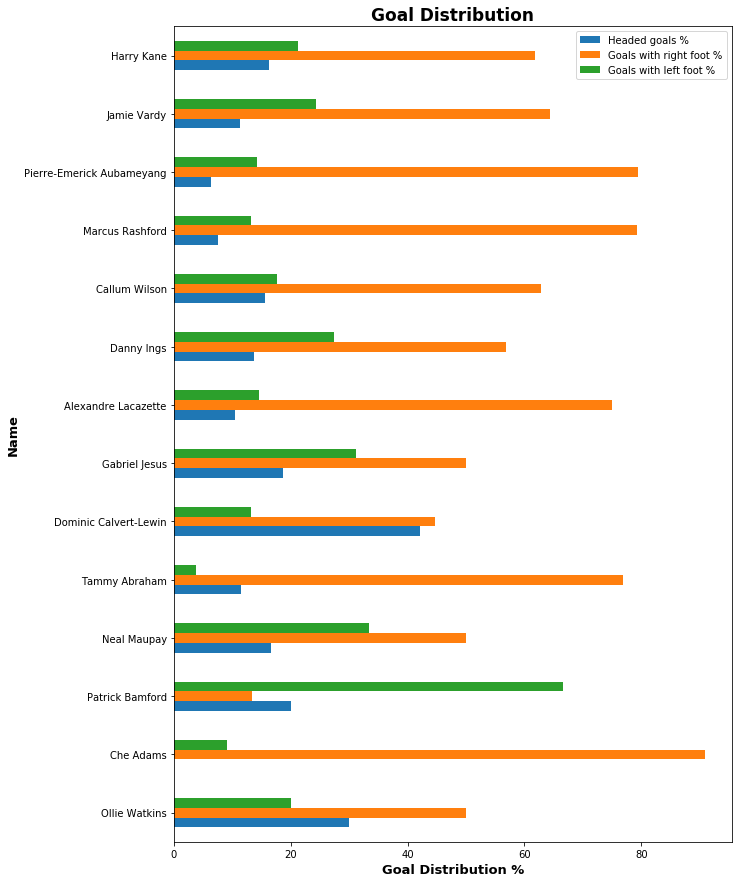

In [36]:
top_scorer_dist[['Name', 'Headed goals %', 'Goals with right foot %', 'Goals with left foot %']].set_index('Name').iloc[::-1].plot(kind='barh', figsize=(10,15))
plt.xlabel('Goal Distribution %', fontsize=13, fontweight='bold')
plt.ylabel('Name', fontsize=13, fontweight='bold')
plt.title('Goal Distribution', fontsize=17, fontweight='bold')
plt.show()

In [37]:
# Top scorer goal distrubution compared / free kicks and penalties not included
top_scorer_dist[['Name', 'Headed goals %', 'Goals with right foot %', 'Goals with left foot %']].set_index('Name').iloc[::-1]

,Headed goals %,Goals with right foot %,Goals with left foot %
Name,,,
Ollie Watkins,30.00,50.00,20.00
Che Adams,0.00,90.91,9.09
Patrick Bamford,20.00,13.33,66.67
Neal Maupay,16.67,50.00,33.33
Tammy Abraham,11.54,76.92,3.85
Dominic Calvert-Lewin,42.11,44.74,13.16
Gabriel Jesus,18.75,50.00,31.25
Alexandre Lacazette,10.42,75.00,14.58
Danny Ings,13.73,56.86,27.45


## Conclusion 🙌 <a class="anchor" id="conclusion"></a>

And that's it! We have just successfully programmatically scraped data from the Premier League website using three different methods. Using HTML table using pd.read_HTML(), then using Beautiful Soup, and finally a REST API. Hopefully the emoji's added some style to our substance 🔥🔥🔥. Congratulations!

#### Useful Links
https://thispointer.com/python-remove-elements-from-a-list-while-iterating/ \
https://stackoverflow.com/questions/904746/how-to-remove-all-characters-after-a-specific-character-in-python \
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html \
https://stackoverflow.com/questions/50185926/valueerror-shape-of-passed-values-is-1-6-indices-imply-6-6 \
https://stackoverflow.com/questions/3232953/python-removing-spaces-from-list-objects/39668144 \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html \
https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
https://www.codementor.io/blog/python-web-scraping-63l2v9sf2q \
https://stackoverflow.com/questions/48243018/concatenate-string-to-the-end-of-all-elements-of-a-list-in-python \
https://stackoverflow.com/questions/22702277/crawl-site-that-has-infinite-scrolling-using-python \
https://www.accordbox.com/blog/how-crawl-infinite-scrolling-pages-using-python/ \
https://chromedriver.chromium.org/downloads \
https://stackoverflow.com/questions/42478591/python-selenium-chrome-webdriver \
https://www.pluralsight.com/guides/advanced-web-scraping-tactics-python-playbook \
https://datatofish.com/convert-pandas-dataframe-to-list/ \
https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html \
https://www.programiz.com/python-programming/function \
https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/ \
https://stackoverflow.com/questions/54343378/pandas-valueerror-pattern-contains-no-capture-groups \
https://www.w3resource.com/pandas/series/series-str-extract.php \
https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/ \
https://www.geeksforgeeks.org/parsing-and-processing-url-using-python-regex/ \
https://stackoverflow.com/questions/51074511/how-to-stop-execution-of-infinite-loop-with-exception-handling \
https://towardsdatascience.com/web-scraping-advanced-football-statistics-11cace1d863a \
https://stackoverflow.com/questions/56206038/how-to-loop-through-paginated-api-using-python \
https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas \
https://stackoverflow.com/questions/16842001/copy-text-between-parentheses-in-pandas-dataframe-column-into-another-column \
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy \
https://pandas.pydata.org/pandas-docs/version/0.22/api.html#string-handling